<a href="https://colab.research.google.com/github/ismael-rtellez/Mt_Fuji_descent_issue_series/blob/main/Mt_Fuji_descent_issue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Acquisition

In [ ]:
import numpy as np

csv_path = "mtfuji_data.csv" # Specify the file name (path)

np.set_printoptions(suppress=True) # Set prohibition of scientific notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

print(fuji)
print(fuji.shape)

[[    0.          35.134141   139.132082     0.           0.      ]
 [    1.          35.135826   139.129202     0.         322.      ]
 [    2.          35.13751    139.126322     0.         644.      ]
 ...
 [  297.          35.631284   138.271368  1973.99     95698.      ]
 [  298.          35.632947   138.268452  1841.36     96020.      ]
 [  299.          35.63461    138.265536  1725.8      96343.      ]]
(300, 5)


## Probelm 1: Data Visualizacion

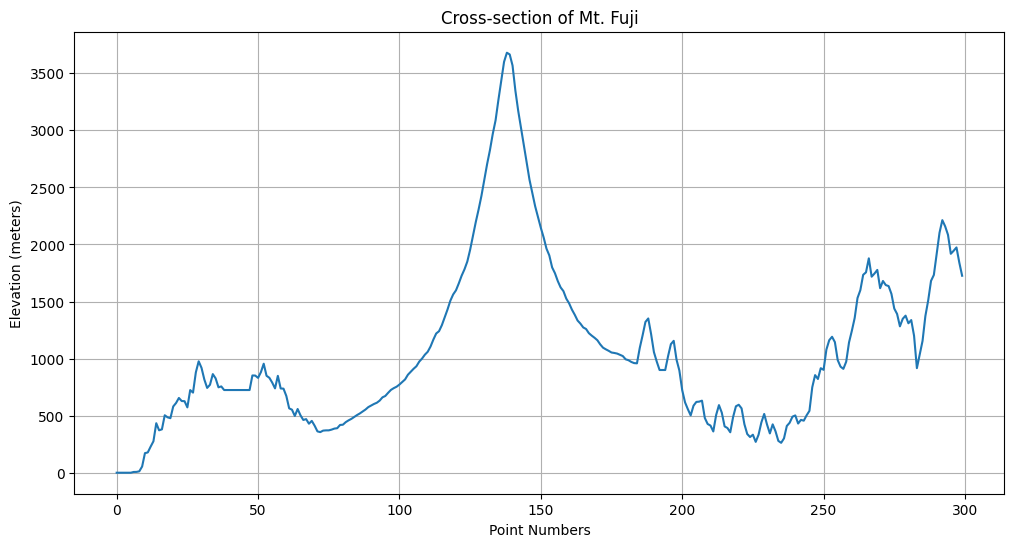

In [ ]:
import matplotlib.pyplot as plt

#Extract point numbers and elevation
point_numbers = fuji[:, 0]
elevations = fuji[:, 3]

#Visualize the cross-section of Mt. Fuji
plt.figure(figsize=(12, 6))
plt.plot(point_numbers, elevations)
plt.title('Cross-section of Mt. Fuji')
plt.xlabel('Point Numbers')
plt.ylabel('Elevation (meters)')
plt.grid(True)
plt.show()

## Problem 2: Create a Function to calculate the gradient at a certain point

In [ ]:
def calculate_gradient(fuji_data, current_point):
  if current_point <= 0:
    # Cannot calculate gradient at the first point
    return 0 # No previous point to compare

  #Extract current and previous point data
  current_x = fuji_data[current_point, 0] # Point number
  current_y = fuji_data[current_point, 3] # Elevation

  prev_x = fuji_data[current_point - 1, 0]  # Previous point number
  prev_y = fuji_data[current_point - 1, 3]  # Previous elevation

  # calculate gradient : (y2 - y1)/(x2 - x1)
  dx = current_x - prev_x
  dy = current_y - prev_y

  # Avoid division by zero
  if dx == 0:
    return 0

  return dy/dx

#test
current_point = 100
gradient = calculate_gradient(fuji, current_point)
print(f"Gradient at point {current_point}: {gradient}")

Gradient at point 100: 18.90000000000009


## Problem 3: Create a function to calculate destination point

In [ ]:
def calculate_next_point(fuji_data, current_point, alpha=0.2):
  #Calculate the gradient at the current point
  gradient = calculate_gradient(fuji_data, current_point)

  #Calculate the next point: current_point - alpha * gradient
  next_point_float = current_point - alpha * gradient

  #Round to the nearest integer
  next_point = round(next_point_float)

  #Ensure the next point is within valid range
  if next_point < 0:
    next_point = 0
  elif next_point >= len(fuji_data):
    next_point = len(fuji_data) - 1

  return next_point

In [ ]:
#test
current_point = 100
next_point = calculate_next_point(fuji, current_point)
print(f"Next point after point {current_point}: {next_point}")

Next point after point 100: 96


## Problem 4: Create a function to go down the mountain

In [ ]:
def descend_mountain(fuji_data, start_point=136, alpha=0.2, max_steps=1000):
    #Initialize the path with the staring point
    path = [start_point]
    current_point = start_point

    # Descend until we reach a local minimum or maximum steps
    for _ in range(max_steps):
      next_point = calculate_next_point(fuji_data, current_point, alpha)

      # if we're stuck at the same point, we're reached a local minimum
      if next_point == current_point:
          break

      # Move to the next point
      current_point = next_point
      path.append(current_point)

    return path

In [ ]:
# test
descending_path = descend_mountain(fuji)
print("Descending Path: ", descending_path)

Descending Path:  [136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]


## Problem 5: Visualization of the descent process

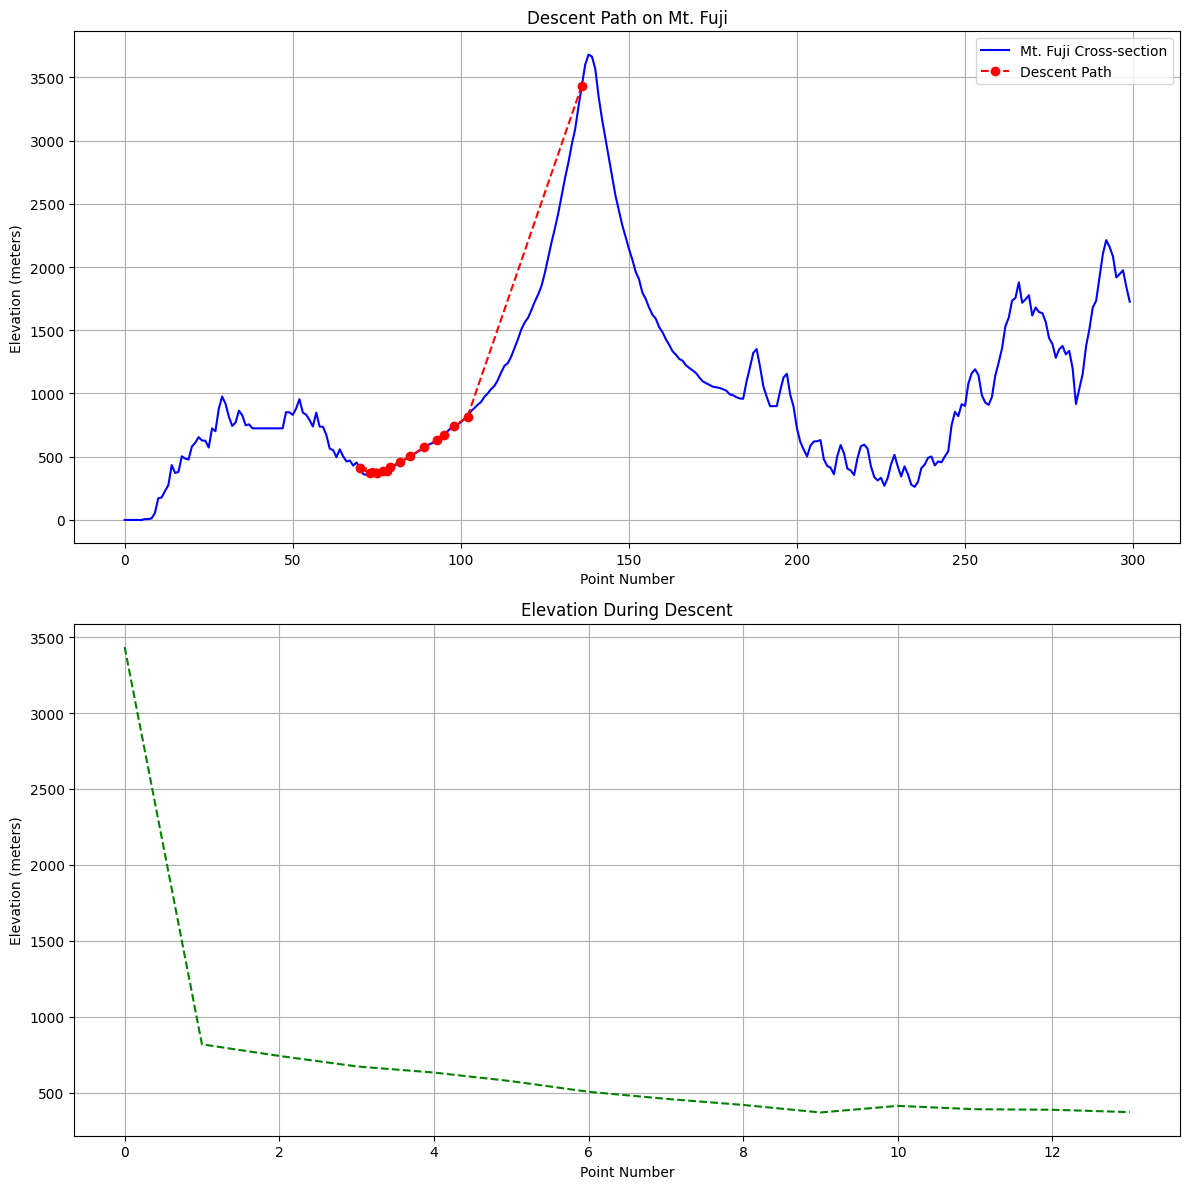

In [ ]:
def visualize_descent(fuji_data, path):
  #Extract point numbers and elevations
  point_numbers = fuji_data[:, 0]
  elevations = fuji_data[:, 3]

  #Extract the path coordinates
  path_points = [fuji_data[p, 0] for p in path]
  path_elevations = [fuji_data[p, 3] for p in path]

  #Create a figure with two subplots
  fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

  #Plot the cross-section with descent path
  ax1.plot(point_numbers, elevations, 'b-', label='Mt. Fuji Cross-section')
  ax1.plot(path_points, path_elevations, 'ro--', label='Descent Path')
  ax1.set_title('Descent Path on Mt. Fuji')
  ax1.set_xlabel('Point Number')
  ax1.set_ylabel('Elevation (meters)')
  ax1.grid(True)
  ax1.legend()

  #Plot the elevation change during descent
  steps = list(range(len(path)))
  ax2.plot(steps, path_elevations, 'g--')
  ax2.set_title('Elevation During Descent')
  ax2.set_xlabel('Point Number')
  ax2.set_ylabel('Elevation (meters)')
  ax2.grid(True)

  plt.tight_layout()
  plt.show()

descent_path = descend_mountain(fuji, start_point=136, alpha=0.2)
visualize_descent(fuji, descent_path)

## Problem 6: Change of initial value

In [ ]:
def compute_all_descents(fuji_data, alpha=0.2):
  all_paths = {}
  initial_indices = [20, 50, 100, 136, 142, 180]

  for start_point in initial_indices:
    path = descend_mountain(fuji_data, start_point, alpha)
    all_paths[start_point] = path

  return all_paths

In [ ]:
# test
all_descents = compute_all_descents(fuji, alpha=0.2)
print("All Descents: ", all_descents)

All Descents:  {20: [20, 0], 50: [50, 54, 58, 80], 100: [100, 96, 90, 87, 84, 81, 77, 75], 136: [136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75], 142: [142, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173, 176, 177, 178, 180, 186, 164, 169, 173

## Problem 7: Visualization of the descent process for each initial value

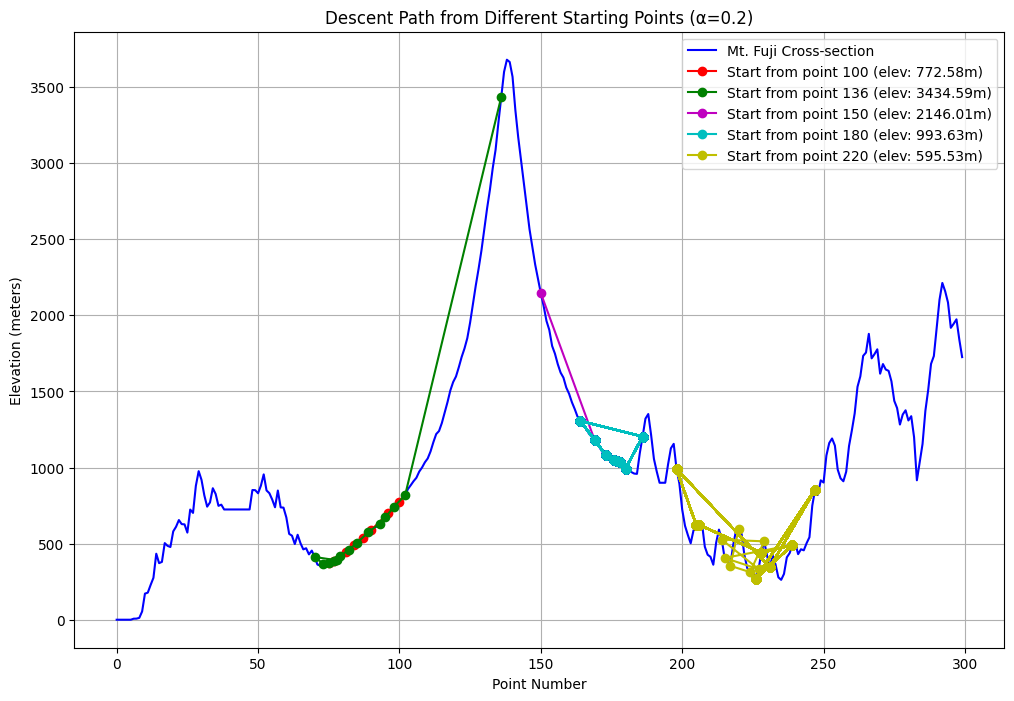

In [ ]:
def visualize_multiple_descents(fuji_data, start_points, alpha=0.2):
  #Extract point numbers and elevations
  point_numbers = fuji_data[:, 0]
  elevations = fuji_data[:, 3]

  #Create figure
  plt.figure(figsize=(12, 8))

  #Plot the cross-section with descent path
  plt.plot(point_numbers, elevations, 'b-', label='Mt. Fuji Cross-section')

  #Plot descent paths from differents starting points
  colors = ['r', 'g', 'm', 'c', 'y']

  for i, start in enumerate(start_points):
    path = descend_mountain(fuji_data, start, alpha)
    path_points = [fuji_data[p, 0] for p in path]
    path_elevations = [fuji_data[p, 3] for p in path]

    color = colors[i % len(colors)]
    plt.plot(path_points, path_elevations, f'{color}o-', label=f'Start from point {start} (elev: {fuji_data[start, 3]:.2f}m)')

  plt.title(f'Descent Path from Different Starting Points (α={alpha})')
  plt.xlabel('Point Number')
  plt.ylabel('Elevation (meters)')
  plt.grid(True)
  plt.legend()
  plt.show()

start_points = [100, 136, 150, 180, 220]
visualize_multiple_descents(fuji, start_points)

## Problem 8: Hyperparameter changes

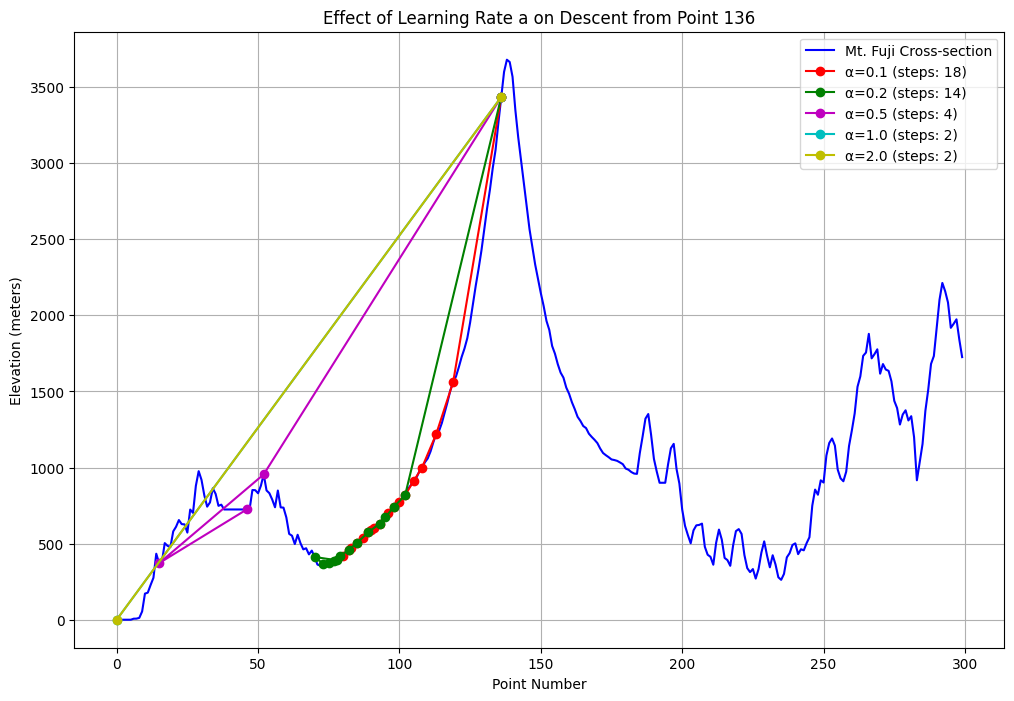

In [ ]:
def visualize_alpha_effects(fuji_data, start_point=136, alphas=[0.1, 0.2, 0.5, 1.0, 2.0]):
  #Extract point numbers and elevations
  point_numbers = fuji_data[:, 0]
  elevations = fuji_data[:, 3]

  #Create figure
  plt.figure(figsize=(12, 8))

  #Plot the cross-section with descent path
  plt.plot(point_numbers, elevations, 'b-', label='Mt. Fuji Cross-section')

  #Plot descent paths from differents starting points
  colors = ['r', 'g', 'm', 'c', 'y']

  for i, alpha in enumerate(alphas):
    path = descend_mountain(fuji_data, start_point, alpha)
    path_points = [fuji_data[p, 0] for p in path]
    path_elevations = [fuji_data[p, 3] for p in path]

    color = colors[i % len(colors)]
    plt.plot(path_points, path_elevations, f'{color}o-', label=f'α={alpha} (steps: {len(path)})')

  plt.title(f'Effect of Learning Rate a on Descent from Point {start_point}')
  plt.xlabel('Point Number')
  plt.ylabel('Elevation (meters)')
  plt.grid(True)
  plt.legend()
  plt.show()

# Test different learning rates
alphas = [0.1, 0.2, 0.5, 1.0, 2.0]
visualize_alpha_effects(fuji, start_point=136, alphas=alphas)